In [301]:
# biblio
import pandas as pd  # manip des données
import matplotlib.pyplot as plt  # courbouet
from sklearn.model_selection import train_test_split  # trin w test (ta9sem)
from sklearn.preprocessing import StandardScaler  # Normalisation des données
from sklearn.neighbors import KNeighborsClassifier  # Algorithme KNN
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # performance mtaa prg
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Arbre de décision
from sklearn.neural_network import MLPClassifier  # Réseau de neurones (Perceptron multicouche)

In [302]:
orange= pd.read_csv('Orange Quality Data.csv')
orange.head(5)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,4.5


In [303]:
orange=orange.rename(columns={"Quality (1-5)": "quality"})

In [304]:
orange["quality"] = orange["quality"].apply(lambda x: "high" if x > 3 else "low")

In [305]:
orange["quality"].value_counts()
print (orange)

     Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
0          7.5         180              12.0           3.2             2.0   
1          8.2         220              10.5           3.4             3.0   
2          6.8         150              14.0           3.0             1.0   
3          9.0         250               8.5           3.8             4.0   
4          8.5         210              11.5           3.3             2.5   
..         ...         ...               ...           ...             ...   
236        8.0         194              10.9           3.6             5.0   
237        7.4         275               8.5           3.5             5.0   
238        7.5         196              15.7           3.0             3.0   
239        7.2         251               9.8           4.3             3.0   
240        7.3         282              10.5           2.9             4.0   

     HarvestTime (days)  Ripeness (1-5) quality  
0            

In [306]:
X = orange.drop("quality", axis=1)
y = orange["quality"] 

In [307]:
#normalisation des données 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [308]:
#separation train w test 20%test 80%train
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1
)

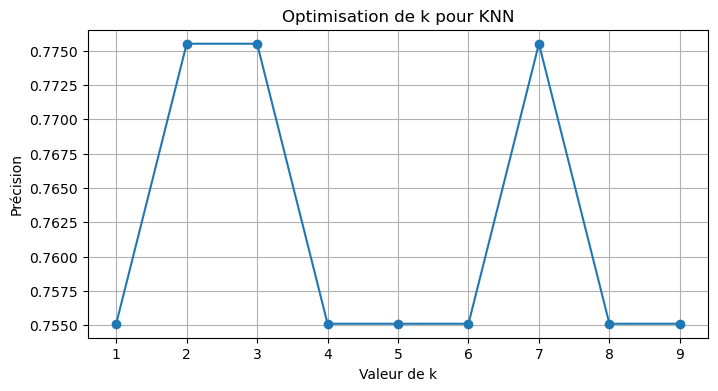

Meilleur k trouvé : 2 avec précision = 0.78
[[35  0]
 [11  3]]


In [335]:
#knn
k_tab = range(1, 10)
accuracies = [] 
for k in k_tab:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) # entrainnement
    y_pred = knn.predict(X_test)# prediction 
    accuracies.append(accuracy_score(y_test, y_pred)) #liste  des accuracy
# Affichage de la précision selon k
plt.figure(figsize=(8, 4))
plt.plot(k_tab, accuracies, marker='o')
plt.title("Optimisation de k pour KNN")
plt.xlabel("Valeur de k")
plt.ylabel("Précision")
plt.xticks(k_tab)
plt.grid(True)
plt.show()
# a7sen k
best_k = k_range[accuracies.index(max(accuracies))]   # k[ahsen accyracy]
print(f"Meilleur k trouvé : {best_k} avec précision = {max(accuracies):.2f}")
#matrice 
# Entraîner KNN final avec le meilleur k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)
# matrice KNN final
print (confusion_matrix(y_test,y_pred))


Arbre de décision - Précision (accuracy): 0.8571428571428571
              precision    recall  f1-score   support

        high       0.85      0.94      0.89        35
         low       0.80      0.57      0.67        14

    accuracy                           0.84        49
   macro avg       0.82      0.76      0.78        49
weighted avg       0.83      0.84      0.83        49



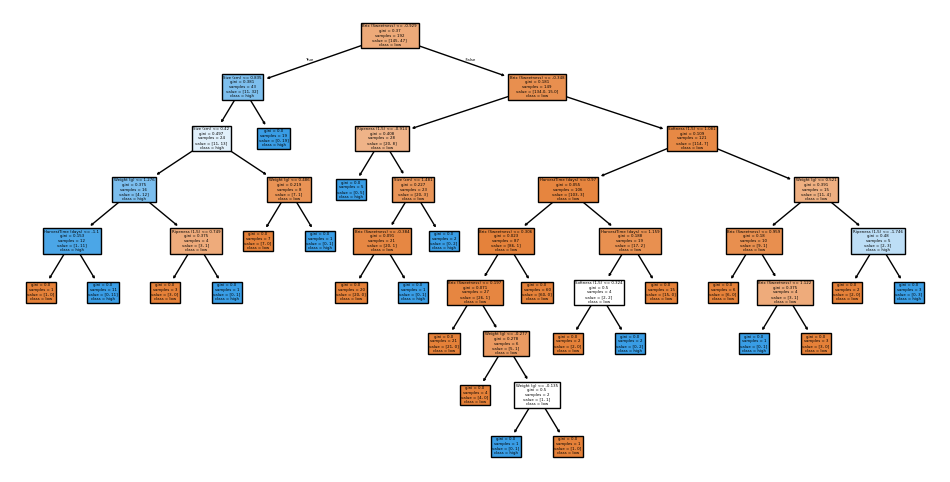

[[32  3]
 [ 4 10]]


In [347]:
#tree
tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Arbre de décision - Précision (accuracy):", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_mlp))
# 7. Afficher l'arbre
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, class_names=["low", "high"], filled=True)
plt.show()
print (confusion_matrix(y_test,y_pred_tree))

In [343]:
#neurones
mlp = MLPClassifier(hidden_layer_sizes=(7), max_iter=2000, random_state=1).fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("Réseau de neurones - Précision :", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
print(f"Architecture du réseau : {mlp.hidden_layer_sizes} neurones cachés")
print (confusion_matrix(y_test,y_pred_mlp))

Réseau de neurones - Précision : 0.8367346938775511
              precision    recall  f1-score   support

        high       0.85      0.94      0.89        35
         low       0.80      0.57      0.67        14

    accuracy                           0.84        49
   macro avg       0.82      0.76      0.78        49
weighted avg       0.83      0.84      0.83        49

Architecture du réseau : 7 neurones cachés
[[33  2]
 [ 6  8]]


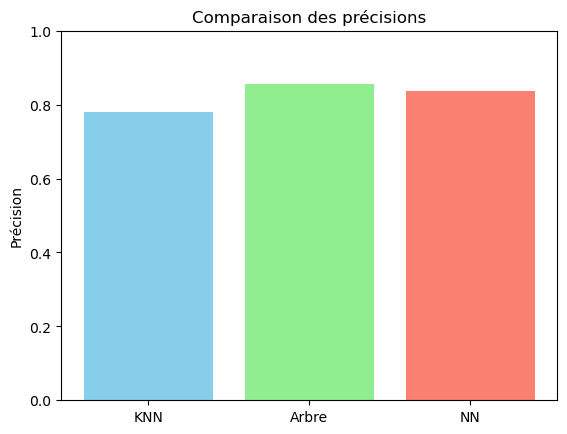

In [341]:
precision_knn = 0.78
precision_tree = 0.857
precision_nn = 0.836

# Affichage comparaison Visuelle des Précisions
plt.bar(["KNN", "Arbre", "NN"], [precision_knn, precision_tree, precision_nn], color=["skyblue", "lightgreen", "salmon"])
plt.ylabel("Précision")
plt.title("Comparaison des précisions")
plt.ylim(0, 1)
plt.show()